<a href="https://colab.research.google.com/github/dnguyet06/B-i-t-p-AI/blob/main/baif_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 14.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#input
product_demand=ctrl.Antecedent(np.arange(0,3.1,0.1),'product_demand')
competitor_price=ctrl.Antecedent(np.arange(0,3.1,0.1),'competitor_price')
store_reputation=ctrl.Antecedent(np.arange(0,5,0.1),'store_reputation')
profit=ctrl.Antecedent(np.arange(0,3.1,0.1),'profit')
seasonal_demand=ctrl.Antecedent(np.arange(0,3.1,0.1),'seasonal_demand')
#output
discount=ctrl.Consequent(np.arange(0,71,0.1),'discount')

In [ ]:
product_demand['l']=fuzz.trimf(product_demand.universe,[0,0,1])
product_demand['m']=fuzz.trimf(product_demand.universe,[0.3,1,1.8])
product_demand['h']=fuzz.trimf(product_demand.universe,[1.7,2,3])
competitor_price['l']=fuzz.trimf(competitor_price.universe,[0,0,1])
competitor_price['m']=fuzz.trimf(competitor_price.universe,[0.5,1,1.8])
competitor_price['h']=fuzz.trimf(competitor_price.universe,[1.3,2.6,3])
store_reputation['l']=fuzz.trimf(store_reputation.universe,[0,0,4])
store_reputation['m']=fuzz.trimf(store_reputation.universe,[3.5,4,4.5])
store_reputation['h']=fuzz.trimf(store_reputation.universe,[4,4.5,4.5])
profit['l']=fuzz.trimf(profit.universe,[0,0,1])
profit['m']=fuzz.trimf(profit.universe,[0.5,1.5,1.8])
profit['h']=fuzz.trimf(profit.universe,[1.7,2.6,3])
seasonal_demand['n']=fuzz.trimf(seasonal_demand.universe,[0,0,1])
seasonal_demand['m']=fuzz.trimf(seasonal_demand.universe,[0.5,1,1.5])
seasonal_demand['h']=fuzz.trimf(seasonal_demand.universe,[1,2,3])
discount['vl']=fuzz.trimf(discount.universe,[0,0,5])
discount['l']=fuzz.trimf(discount.universe,[4,5,10])
discount['m']=fuzz.trimf(discount.universe,[8,10,20])
discount['h']=fuzz.trimf(discount.universe,[15,20,40])
discount['vh']=fuzz.trimf(discount.universe,[35,40,70])

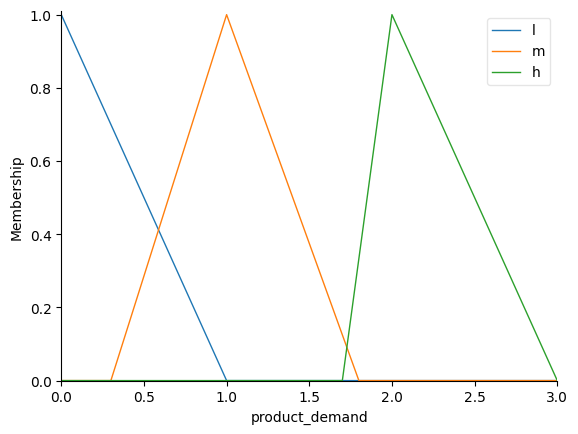

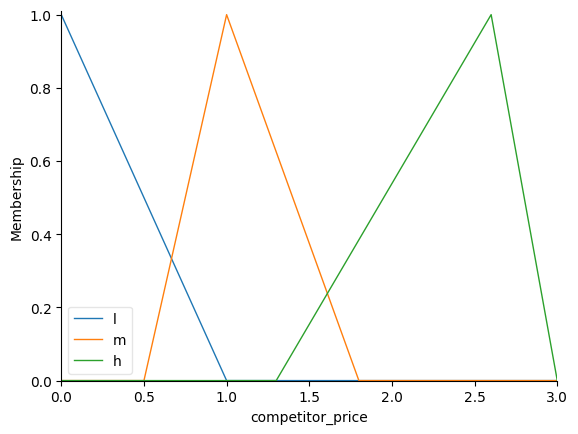

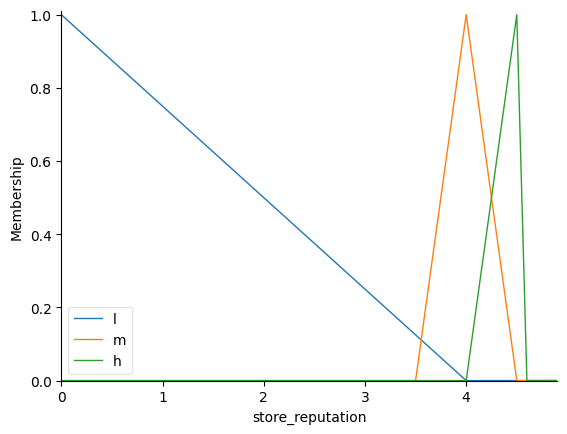

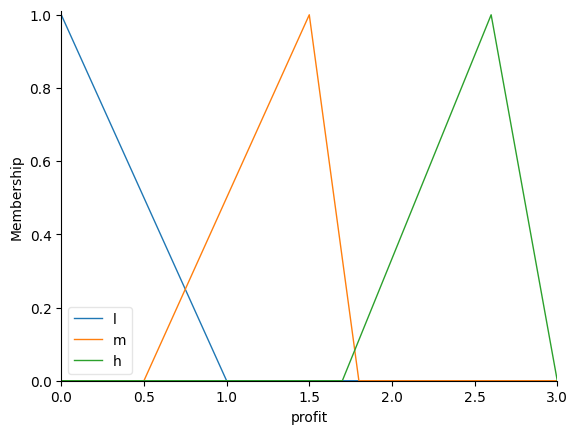

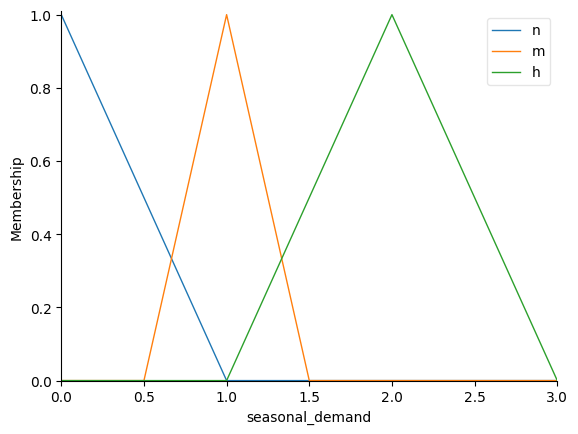

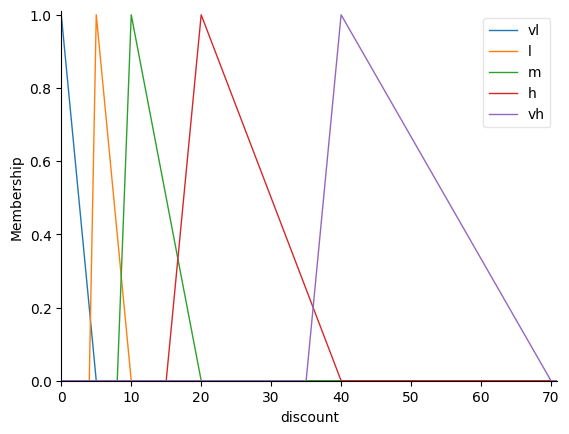

In [ ]:
product_demand.view()
competitor_price.view()
store_reputation.view()
profit.view()
seasonal_demand.view()
discount.view()

In [ ]:
rule1=ctrl.Rule(product_demand['h']&competitor_price['l']&profit['l'],discount['vl'])
rule2=ctrl.Rule(product_demand['l']&competitor_price['h']&profit['h'],discount['h'])
rule3=ctrl.Rule(store_reputation['h']&profit['m']&seasonal_demand['h'],discount['m'])
rule4=ctrl.Rule(competitor_price['h']&seasonal_demand['h']&profit['h'],discount['vh'])
rule5=ctrl.Rule(store_reputation['l']&product_demand['m']&profit['l'],discount['m'])
rule6=ctrl.Rule(product_demand['h']&seasonal_demand['n']&competitor_price['l'],discount['m'])
rule7=ctrl.Rule(profit['h']&competitor_price['m']&seasonal_demand['m'],discount['m'])

51.88596491228069


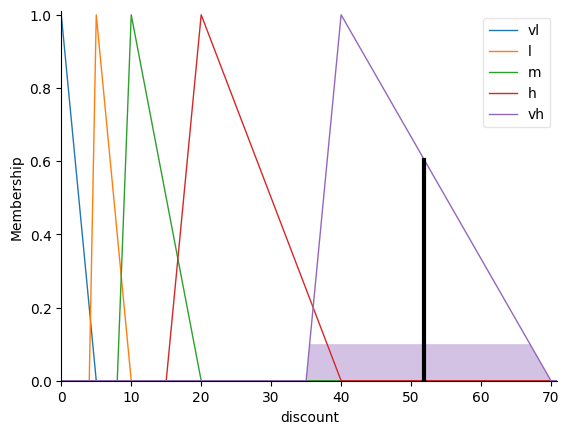

In [ ]:
strategy=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7])
sim=ctrl.ControlSystemSimulation(strategy)
sim.input['product_demand']=2
sim.input['competitor_price']=2.6
sim.input['store_reputation']=4.2
sim.input['profit']=2.8
sim.input['seasonal_demand']=2.9
sim.compute()
print(sim.output['discount'])
discount.view(sim)